In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
pd.set_option('display.max_columns',100)

In [61]:
#import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [62]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# prinnt length of df_train
len(df_train)

1460

In [64]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [65]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, -0.5, 'Sale price distribution')

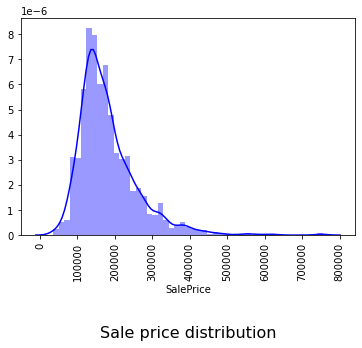

In [66]:
# look at the distribution of sale price
sns.distplot(df_train['SalePrice'], color = 'blue')
plt.xticks(rotation=90);
plt.title('Sale price distribution', y=-0.5, fontsize = 16)

In [68]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

Text(0.5, -0.5, 'Sale price distribution')

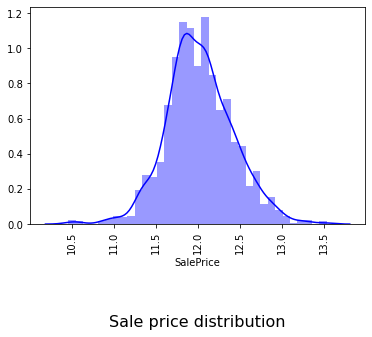

In [69]:
sns.distplot(df_train['SalePrice'], color = 'blue')
plt.xticks(rotation=90);
plt.title('Sale price distribution', y=-0.5, fontsize = 16)

Text(15, 50, 'Correlation')

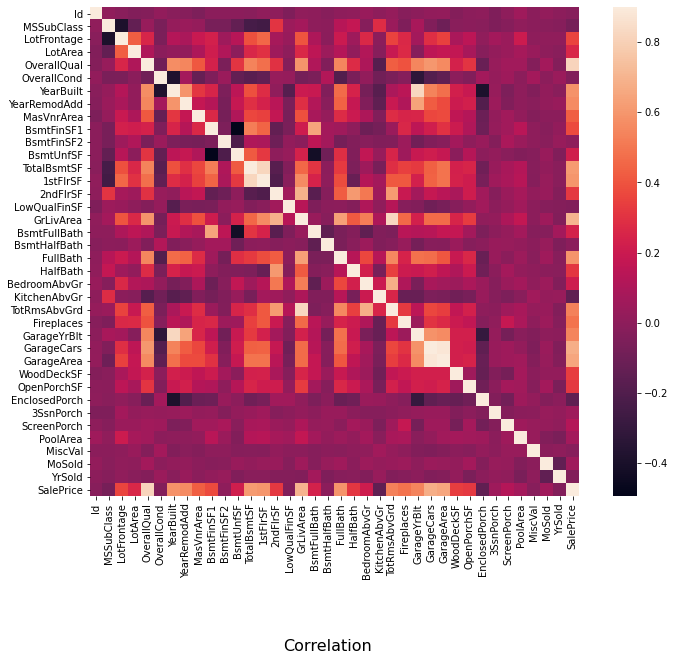

In [70]:
corrmat = df_train.corr()
fig, ax = plt.subplots(figsize=(12, 9))
heat = sns.heatmap(corrmat, vmax=0.9, square=True);
heat.text(15, 50, 'Correlation',fontsize=16)

In [71]:
# see correlation with sale price
corrmat["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [72]:
#seaborn pairplot
# sns.set()
# cols = df_train.columns
# pairp = sns.pairplot(df_train[cols], size = 1.5)
# plt.show()

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
# drop some columns that most contain null values
try:
    df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
except:
    pass

In [75]:
# columns with null values
col_null = df_train.columns[df_train.isnull().any()]
col_null

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [125]:
df_int = df_train.select_dtypes(include=['int64'])
df_int

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010


In [126]:
df_train['LotShape'] = df_train['LotShape'].map({'IR3':0, 'IR2':1, 'IR1': 2, 'Reg': 3})
df_train['LandSlope'] = df_train['LandSlope'].map({'Sev':0, 'Mod':1, 'Gtl': 2})
df_train['HouseStyle'] = df_train['HouseStyle'].map({'1Story':0, '1.5Fin':1, '1.5Unf': 2, '2Story':3, '2.5Fin':4, '2.5Unf': 5, 'SFoyer':6, 'SLvl':7})


In [118]:
df_int.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F55607A00>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

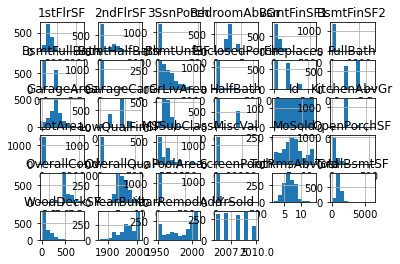

In [122]:
plt.figure(figsize=(20,20))

df_train.hist(column=df_int.columns)

### from this,

In [76]:
# find categorical columns and numerical columns
col_cat = []
col_num = []
for col in col_null:
    if df_train[col].dtype == 'object':
        col_cat.append(col)
    else:
        col_num.append(col)

In [77]:
# fill na
# fill numerical columns with mean
for col in col_num:
    df_train[col] = df_train[col].fillna(df_train[col].mean())
# fill categorical columns with mosts frequent
for col in col_cat:
    df_train[col] = df_train[col].fillna(df_train[col].value_counts().index[0])

In [78]:
# create x and y
X = df_train.iloc[:,0:-1].drop(['Id'],axis=1)
y = df_train.iloc[:,-1]

In [79]:
# train,validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=0)

In [80]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
numeric_features = col_num
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = col_cat
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = col_cat
ordinal_transformer = LabelEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features).
        ('ord',ordinal_transformer,ordinal_features)])


## Linear Regression

In [86]:
# create pipeline
from sklearn.linear_model import LinearRegression


In [87]:
# fit the model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score = clf.score(X_val,y_val.values)
print('score:{}'.format(score))
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_val.values)
print(f'r2 score:{r2}')

score:0.6002368135666387
r2 score:0.43921164428091586


In [90]:
# scross val score
from sklearn.model_selection import cross_val_score
scores_cross_val = cross_val_score(clf, X_train, y_train, cv=5)
print(scores_cross_val)

[0.60507173 0.57777916 0.58470206 0.64155048 0.55628962]


In [52]:
from sklearn.ensemble import RandomForestRegressor
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators = 10))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score = clf.score(X_val,y_val.values)
print('score:{}'.format(score))
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_val.values)
print(f'r2 score:{r2}')

score:0.5791662416221341
r2 score:0.3300415233465448


In [53]:
from sklearn.svm import LinearSVC
# fit the model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score = clf.score(X_val,y_val.values)
print(f'score:{score:.3f}')

score:0.011


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [54]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_pred,y_val) 

3960832463.6191783

In [105]:
# do the same for X_test
# drop some columns that most contain null values
df_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
# fill na
# fill numerical columns with mean
for col in col_num:
    df_test[col] = df_test[col].fillna(df_train[col].mean())
# fill categorical columns with mosts frequent
for col in col_cat:
    df_test[col] = df_test[col].fillna(df_train[col].value_counts().index[0])
# create x and y
X_test = df_test

In [106]:
y_predict = clf.predict(X_test)

In [108]:
y_predict

array([115000, 135000, 180000, ..., 235000, 133000, 185000], dtype=int64)